In [1]:

import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


import pandas as pd

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('LSC_words_Data_v2') 

# Actions that we try to detec
actions = np.array(['sordo','hola','bien','mal','adios','bienvenido','gracias','perdon','permiso',
                    'yo','tu','el','ella','nosotros','usted','ustedes','que','cuando','donde',
                    'como','quien','cuanto','cual',
                    'buenos dias','buenas tardes','buenas noches', 'como estas', 'porfavor'])



# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 30

In [3]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [4]:
label_map = {label:num for num, label in enumerate(actions)}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(560, 30, 258)

In [7]:
np.array(labels).shape

(560,)

In [8]:
X = np.array(sequences)

In [9]:
X.shape

(560, 30, 258)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_test.shape

(112, 28)

In [13]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

#model = Sequential()
#model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
#model.add(LSTM(128, return_sequences=True, activation='relu'))
#model.add(LSTM(128, return_sequences=False, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(actions.shape[0], activation='softmax'))

d:\.Proyectos-DR\ILSC-TesisMaestria\Trabajo de grado\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Entrenar el modelo con parada anticipada
history = model.fit(
    X_train, y_train,
    epochs=300,
    validation_data=(X_test, y_test),    
)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.0378 - loss: 3.3312 - val_accuracy: 0.0357 - val_loss: 3.3129
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0908 - loss: 3.2707 - val_accuracy: 0.0536 - val_loss: 3.1430
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0710 - loss: 3.1362 - val_accuracy: 0.0625 - val_loss: 3.0894
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0900 - loss: 3.0443 - val_accuracy: 0.0536 - val_loss: 2.9865
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1114 - loss: 2.9596 - val_accuracy: 0.0357 - val_loss: 2.8960
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0696 - loss: 2.9074 - val_accuracy: 0.0804 - val_loss: 2.9196
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1063 - loss: 2.9000 - val_accuracy: 0.0982 - val_loss: 2.7795
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0944 - loss: 2.7544 - val_accuracy: 0.

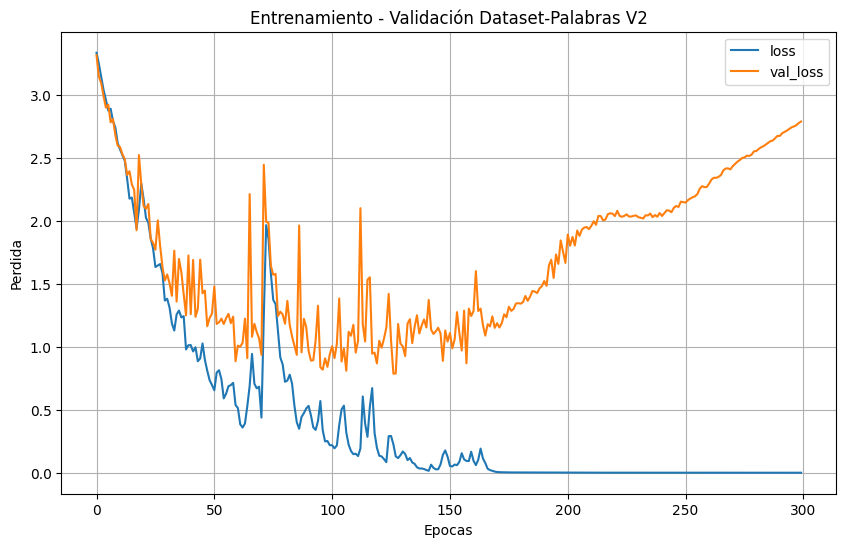

In [16]:
# Crear DataFrame del historial de entrenamiento
history_df = pd.DataFrame(history.history)

# Crear una figura para las pérdidas
plt.figure(figsize=(10, 6))
ax1 = plt.gca()  # Obtener el eje actual

# Graficar las pérdidas (loss y val_loss) en el eje
history_df[['loss', 'val_loss']].plot(ax=ax1, grid=True)
plt.title('Entrenamiento - Validación Dataset-Palabras V2')
plt.xlabel('Epocas')
plt.ylabel('Perdida')

# Guardar la gráfica en un archivo .jpeg
plt.savefig('loss_plot_wordsV2.jpeg', format='jpeg')

# Mostrar la gráfica
plt.show()

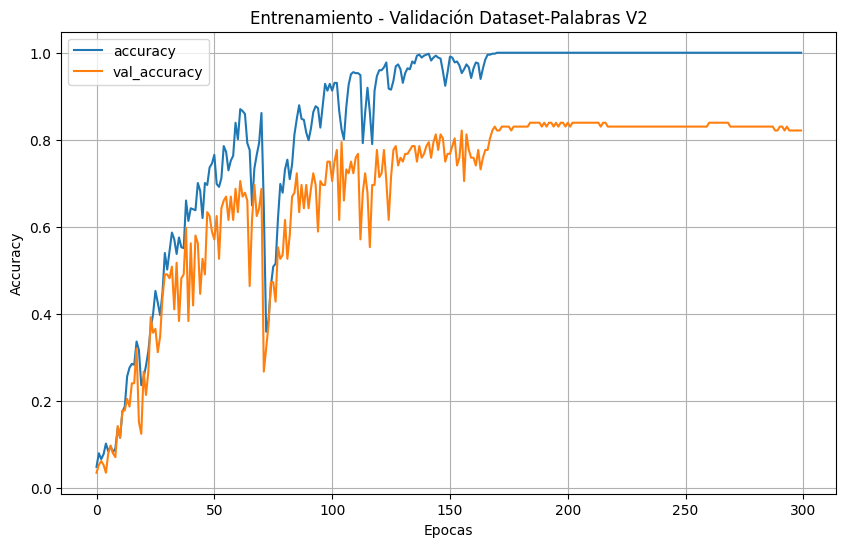

In [17]:
# Crear una figura para las precisiones
plt.figure(figsize=(10, 6))
ax2 = plt.gca()  # Obtener el eje actual

# Graficar las precisiones (accuracy y val_accuracy) en el eje
history_df[['accuracy', 'val_accuracy']].plot(ax=ax2, grid=True)
plt.title('Entrenamiento - Validación Dataset-Palabras V2')
plt.xlabel('Epocas')
plt.ylabel('Accuracy')

# Guardar la gráfica en un archivo .jpeg
plt.savefig('accuracy_plot_wordsV2.jpeg', format='jpeg')

# Mostrar la gráfica
plt.show()

In [18]:
# usar metodo evaluate() para evaluar el modelo entrenado

loss_test, accuracy_test = model.evaluate(X_test, y_test)

print(f"Loss: {loss_test}")
print(f"Accuracy: {accuracy_test}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8171 - loss: 2.4121
Loss: 2.7860286235809326
Accuracy: 0.8214285969734192


In [19]:
# usar metodo evaluate() para evaluar el modelo entrenado

loss_train, accuracy_train = model.evaluate(X_train, y_train)

print(f"Loss: {loss_train}")
print(f"Accuracy: {accuracy_train}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 8.1570e-05
Loss: 7.90413687354885e-05
Accuracy: 1.0


In [20]:
model.save('actionPalabrasV2.h5')